In [1]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Parametric T-test

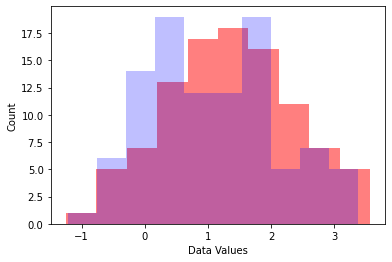

2.030322987079577
0.04500575023448435


In [18]:
np.random.seed(0)
N =100
cond_mu = 1.3,1
cond_std = 1,1

d1 = (np.random.randn(N) * cond_std[0]) + cond_mu[0]
d2 = (np.random.randn(N) * cond_std[1]) + cond_mu[1]

plt.hist(d1,color='r',alpha=.5)
plt.hist(d2,color='b',alpha=.25)
plt.xlabel('Data Values')
plt.ylabel('Count')
plt.show()


# take the differences between 2 samples
t_stats = stats.ttest_1samp(d1-d2,0)

parametric_t = t_stats.statistic
parametric_p = t_stats.pvalue
print(parametric_t)
print(parametric_p)

# repeated, related sample
# t_stats = stats.ttest_rel(d1,d2)

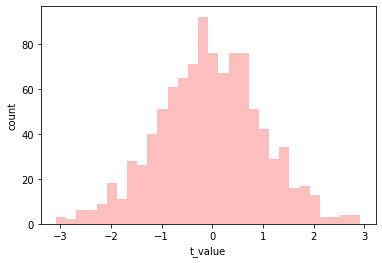

0.04400000000000004


In [31]:
np.random.seed(0)

# randomization test
num_rands = 1000

# this will store the empirical distribution of t-values
null_t = np.zeros(num_rands)

for i in np.arange(num_rands):
    
    # this is a quick way equivalent to assigning exsisting variabels to condition 1 and 2
    rand_data = np.sign(np.random.rand(N) - .5) * (d1-d2)
    # np.sign: 1 if positive, -1 if negative
    
    null_t[i] = stats.ttest_1samp(rand_data,0)[0]
    
plt.hist(null_t,color='r',bins = 30,alpha=.25)
plt.xlabel('t_value')
plt.ylabel('count')
plt.show()

# compute the p-value
rand_p = 1-(np.sum(parametric_t > np.abs(null_t)))/num_rands
print(rand_p)

0.81642051634484 0.0021696288730787875


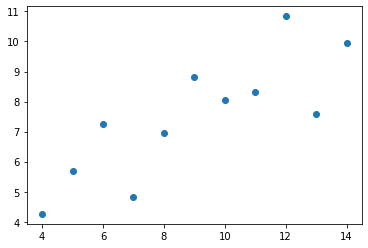

In [39]:
d1 = np.array([10, 8, 13, 9, 11, 14, 6, 4, 12, 7, 5])
d2 = np.array([8.04, 6.95, 7.58, 8.81, 8.33, 9.96, 7.24, 4.26, 10.84, 4.82, 5.68])

N = len(d1)

para_r, para_t = stats.pearsonr(d1,d2)
print(para_r, para_t)

plt.scatter(d1,d2)
plt.show()

In [42]:
np.random.seed(0)

num_rands = 5000

null_r = np.zeros(num_rands)

tmp0 = np.zeros(N)
tmp1 = np.zeros(N)

for i in np.arange(num_rands):
    for j in np.arange(N):
        if np.random.rand() < .5:
            tmp0[j] = d1[j]
            tmp1[j] = d2[j]
        else:
            tmp0[j] = d2[j]
            tmp1[j] = d1[j]
            
    null_r[i],_ = stats.pearsonr(tmp0,tmp1)
    
null_p = 2*(np.sum(null_r > para_r)/num_rands)
print(null_p)

0.03


## Bootstrapping

In [74]:
np.random.seed(0)

# assuming a population of 1000000 people
N = 1000000

pop_mean = 100
pop_std = 10

pop_data = np.random.randn(N) * pop_std + pop_mean


# randomly select 10 samples from 1000000 people
S_N = 10
index = np.random.permutation(N)[0:S_N]
samp_data = pop_data[index]

print(np.mean(pop_data))
print(np.std(pop_data))
print(np.mean(samp_data))
print(np.std(samp_data))

100.01512146515539
9.999213260166576
102.24370279571043
6.294567406743315


In [75]:
# assuming we can only have 20 samples
S_N = 20
index = np.random.permutation(N)[0:S_N]
samp_data = pop_data[index]

# within these 20 samples, resampling with replacement
# if the means of each iteration is stable then these samples are similar
num_boots = 5000

boot_mean = np.zeros(num_boots)

for i in np.arange(num_boots):
    boot_data = samp_data[np.random.randint(S_N, size=S_N)]
    boot_mean[i] = np.mean(boot_data)

# confidence interval
CIs = np.percentile(boot_mean,[2.5,97.5])

In [76]:
np.random.randint(S_N, size=S_N)

array([ 0, 10, 16,  6, 12,  0,  7,  6, 17, 12,  9,  5,  3,  0, 19, 12, 10,
        3,  5, 10])

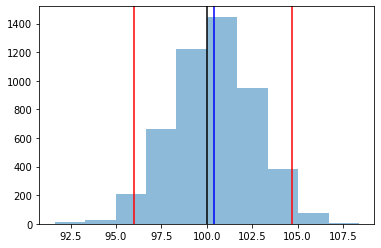

In [78]:
plt.hist(boot_mean,alpha=0.5)
plt.axvline(pop_mean,color ='k')
plt.axvline(np.mean(samp_data),color = 'b')
plt.axvline(CIs[0],color = 'r')
plt.axvline(CIs[1],color = 'r')

### This would be helpful if there are outliers in the data, then by sampling with replacement, we don't always include this outlier